1.Imports libararys and some display seetings

In [15]:

import pandas as pd
import matplotlib.pyplot as plt
import re

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', True)


2. Load the data file and inspect it.

In [16]:
df = pd.read_csv('my_file.csv')
df.columns = df.columns.str.strip()
df.head()


,Rank,Peak,All Time Peak,Actualgross,Adjustedgross(in2022dollars),Artist,Tour title,Year(s),Shows,Average gross,Ref.
0,1,1,2,"$780,000,000","$780,000,000",Taylor Swift,The Eras Tour †,2023–2024,56,"$13,928,571",[1]
1,2,1,7[2],"$579,800,000","$579,800,000",Beyoncé,Renaissance World Tour,2023,56,"$10,353,571",[3]
2,3,1[4],2[5],"$411,000,000","$560,622,615",Madonna,Sticky & Sweet Tour ‡[4][a],2008–2009,85,"$4,835,294",[6]
3,4,2[7],10[7],"$397,300,000","$454,751,555",Pink,Beautiful Trauma World Tour,2018–2019,156,"$2,546,795",[7]
4,5,2[4],NaN,"$345,675,146","$402,844,849",Taylor Swift,Reputation Stadium Tour,2018,53,"$6,522,173",[8]


3.Read and recheck the list heading for smooth output without error.

In [17]:
print(df.columns.tolist())

['Rank', 'Peak', 'All Time Peak', 'Actualgross', 'Adjustedgross(in2022dollars)', 'Artist', 'Tour title', 'Year(s)', 'Shows', 'Average gross', 'Ref.']


4.Clean Monetary & Numeric Columns


In [18]:
money_cols = ['Actualgross', 'Adjustedgross(in2022dollars)', 'Average gross']
for col in money_cols:
    df[col] = (
        df[col]
        .str.replace(r'[\$,]', '', regex=True)  # raw string for regex
        .pipe(pd.to_numeric, errors='coerce')
    )
df['Shows'] = pd.to_numeric(df['Shows'], errors='coerce')
df[['Actualgross', 'Adjustedgross(in2022dollars)', 'Shows', 'Average gross']].head()


,Actualgross,Adjustedgross(in2022dollars),Shows,Average gross
0,780000000.0,780000000,56,13928571
1,579800000.0,579800000,56,10353571
2,411000000.0,560622615,85,4835294
3,397300000.0,454751555,156,2546795
4,345675146.0,402844849,53,6522173


5.Extract the start/end year of each clebrity.

In [19]:
def extract_years(v):
    nums = re.findall(r'\d{4}', v)
    if len(nums) == 1:
        return int(nums[0]), int(nums[0])
    elif len(nums) == 2:
        return int(nums[0]), int(nums[1])
    return pd.NA, pd.NA

df[['Start Year', 'End Year']] = df['Year(s)'].apply(lambda v: pd.Series(extract_years(v)))
df['Artist'] = df['Artist'].str.replace(r'[^A-Za-z0-9\s]', '', regex=True)
df[['Artist','Start Year','End Year']].head()


,Artist,Start Year,End Year
0,Taylor Swift,2023,2024
1,Beyonc,2023,2023
2,Madonna,2008,2009
3,Pink,2018,2019
4,Taylor Swift,2018,2018


6.Calculating the highest total gross of artist in the data.

In [20]:
artist_totals = df.groupby('Artist')['Actualgross'].sum().astype('int64').sort_values(ascending=False)
artist_totals


Artist
Taylor Swift    1526075146
Madonna         1079958363
Pink             838900000
Beyonc           835884556
Lady Gaga        397400000
Celine Dion      280000000
Katy Perry       204000000
Cher             200000000
Adele                    0
Name: Actualgross, dtype: int64

7. Artist with highest average per show.

In [21]:
df['AvgPerShow'] = df['Actualgross'] / df['Shows']
artist_avg = df.groupby('Artist', as_index=False)['AvgPerShow'].mean().sort_values(by='AvgPerShow', ascending=False)
artist_avg


,Artist,AvgPerShow
1,Beyonc,7.789893e+06
8,Taylor Swift,6.285203e+06
6,Madonna,3.401767e+06
7,Pink,3.375165e+06
2,Celine Dion,2.137405e+06
5,Lady Gaga,1.427445e+06
4,Katy Perry,1.350993e+06
3,Cher,6.153846e+05
0,Adele,NaN


8.Artist with highest avg gross per show.

In [22]:
artist_avg = (
    df.assign(AvgPerShow=lambda x: x['Actualgross'] / x['Shows'])
      .groupby('Artist')['AvgPerShow']
      .mean()
      .sort_values(ascending=False)
)
artist_avg


Artist
Beyonc          7.789893e+06
Taylor Swift    6.285203e+06
Madonna         3.401767e+06
Pink            3.375165e+06
Celine Dion     2.137405e+06
Lady Gaga       1.427445e+06
Katy Perry      1.350993e+06
Cher            6.153846e+05
Adele                    NaN
Name: AvgPerShow, dtype: float64

9.Most frequent artists (number of tours).

In [23]:
df['Artist'].value_counts()


Artist
Taylor Swift    4
Madonna         4
Beyonc          3
Pink            3
Lady Gaga       2
Celine Dion     1
Katy Perry      1
Cher            1
Adele           1
Name: count, dtype: int64

10.Ploting Total Gross Distribution.

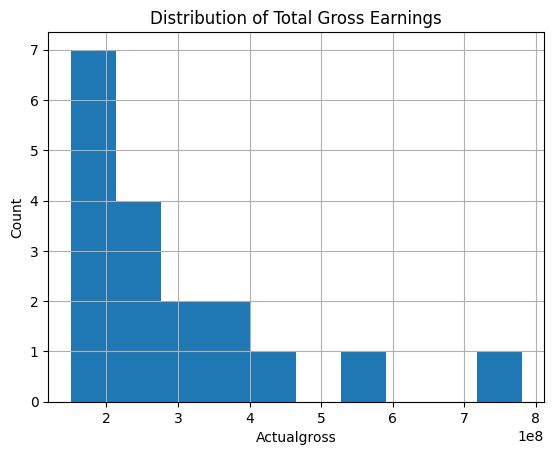

In [24]:
df['Actualgross'].hist(bins=10)
plt.title('Distribution of Total Gross Earnings')
plt.xlabel('Actualgross')
plt.ylabel('Count')
plt.show()


11.Top 10 highest-grossing tours.

In [25]:
top10 = df.nlargest(10, 'Actualgross').set_index('Tour title')
top10['Actualgross']


Tour title
The Eras Tour †                780000000.0
Renaissance World Tour         579800000.0
Sticky & Sweet Tour ‡[4][a]    411000000.0
Beautiful Trauma World Tour    397300000.0
Reputation Stadium Tour        345675146.0
The MDNA Tour                  305158363.0
Taking Chances World Tour      280000000.0
Summer Carnival †              257600000.0
The Formation World Tour       256084556.0
The 1989 World Tour            250400000.0
Name: Actualgross, dtype: float64

12.ploting of tour.

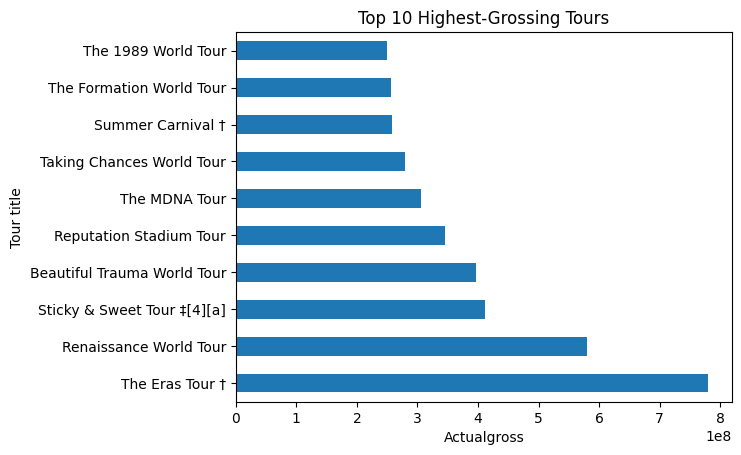

In [26]:
top10['Actualgross'].plot(kind='barh')
plt.title('Top 10 Highest-Grossing Tours')
plt.ylabel('Tour title')
plt.xlabel('Actualgross')
plt.show()


13.tour earning by start year.

In [27]:
yearly = df.groupby('Start Year')['Actualgross'].sum().astype('int64').sort_index()
yearly


Start Year
2002     200000000
2006     194000000
2008     691000000
2009     227400000
2012     475158363
2013     334000000
2014     204000000
2015     420200000
2016     256084556
2018     742975146
2023    1617400000
Name: Actualgross, dtype: int64

14.ploting 

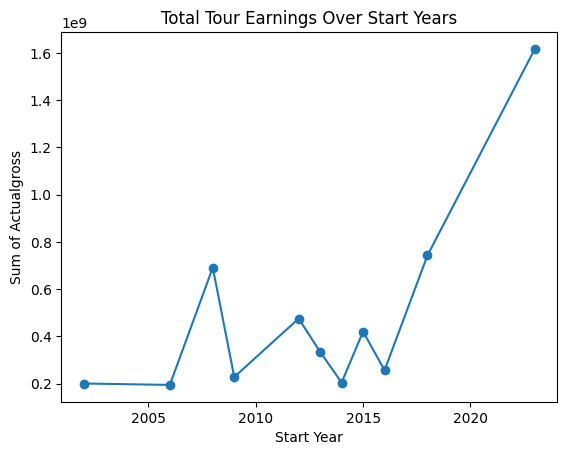

In [28]:
yearly.plot(marker='o')
plt.title('Total Tour Earnings Over Start Years')
plt.xlabel('Start Year')
plt.ylabel('Sum of Actualgross')
plt.show()
